# Input Data

In [1]:
set.seed(64)

In [2]:
countNA <- function(x=NULL,cutOff=NULL){
  output<-FALSE
  perc<-sum(is.na(x))*100/length(x)
  if(perc>cutOff){output<-TRUE}
  output  
}

In [3]:
# path <- "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/GideHugoRiazAmatoLiu_AntiPD1_train.rds"
# train_pos <- readRDS("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/GideHugoRiazAmatoLiu_AntiPD1_train_pos.rds")
library("limma")
library("edgeR")
library("caret")


data <- readRDS("/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables/GideHugoRiaz_AntiPD1_train.rds")
nrow(data)

# data already clean
# row_nas <- apply(data,1,function(x){countNA(x, 50)})
# data <- data[-which(row_nas %in% TRUE),]


# expression matrix
rmc <- c("Patient", "OS", "OS.Event", "RECIST", "Age", "Gender", "Response", "Source")
exp <- data[, -which(colnames(data) %in% rmc)]
exp <- t(exp)
# phenotype
sc <- c("Response", "Source")
ph <- data[, which(colnames(data) %in% sc)]
ph$src <- gsub("(.).*", "\\1", ph$Source)
ph$clr <- "green"
ph[ph$src == "R",]$clr <- "red" 
ph[ph$src == "H",]$clr <- "blue"
# ph[ph$src == "A",]$clr <- "purple"
# ph[ph$src == "L",]$clr <- "black"


ph$clr_res <- "green"
ph[ph$Response == 0,]$clr_res <- "gray"

Loading required package: lattice

Loading required package: ggplot2



[1] 74

# Filter lowly expressed genes
Not Used

In [4]:
# # select genes with an expression above threshold x in p% of samples
# nsmp <- ncol(exp)
# x <- 1  # 2 counts per million = log2 = 1
# n <- 5  # minimum 5 samples
# ridx <- rowSums(exp>x) > n
# table(ridx)
# expf <- exp[ridx, ]
# dim(expf)

# Look for batch effects

In [5]:
trainTransformed <- predict(preProcess(exp, methods=c("center", "scale")), exp)

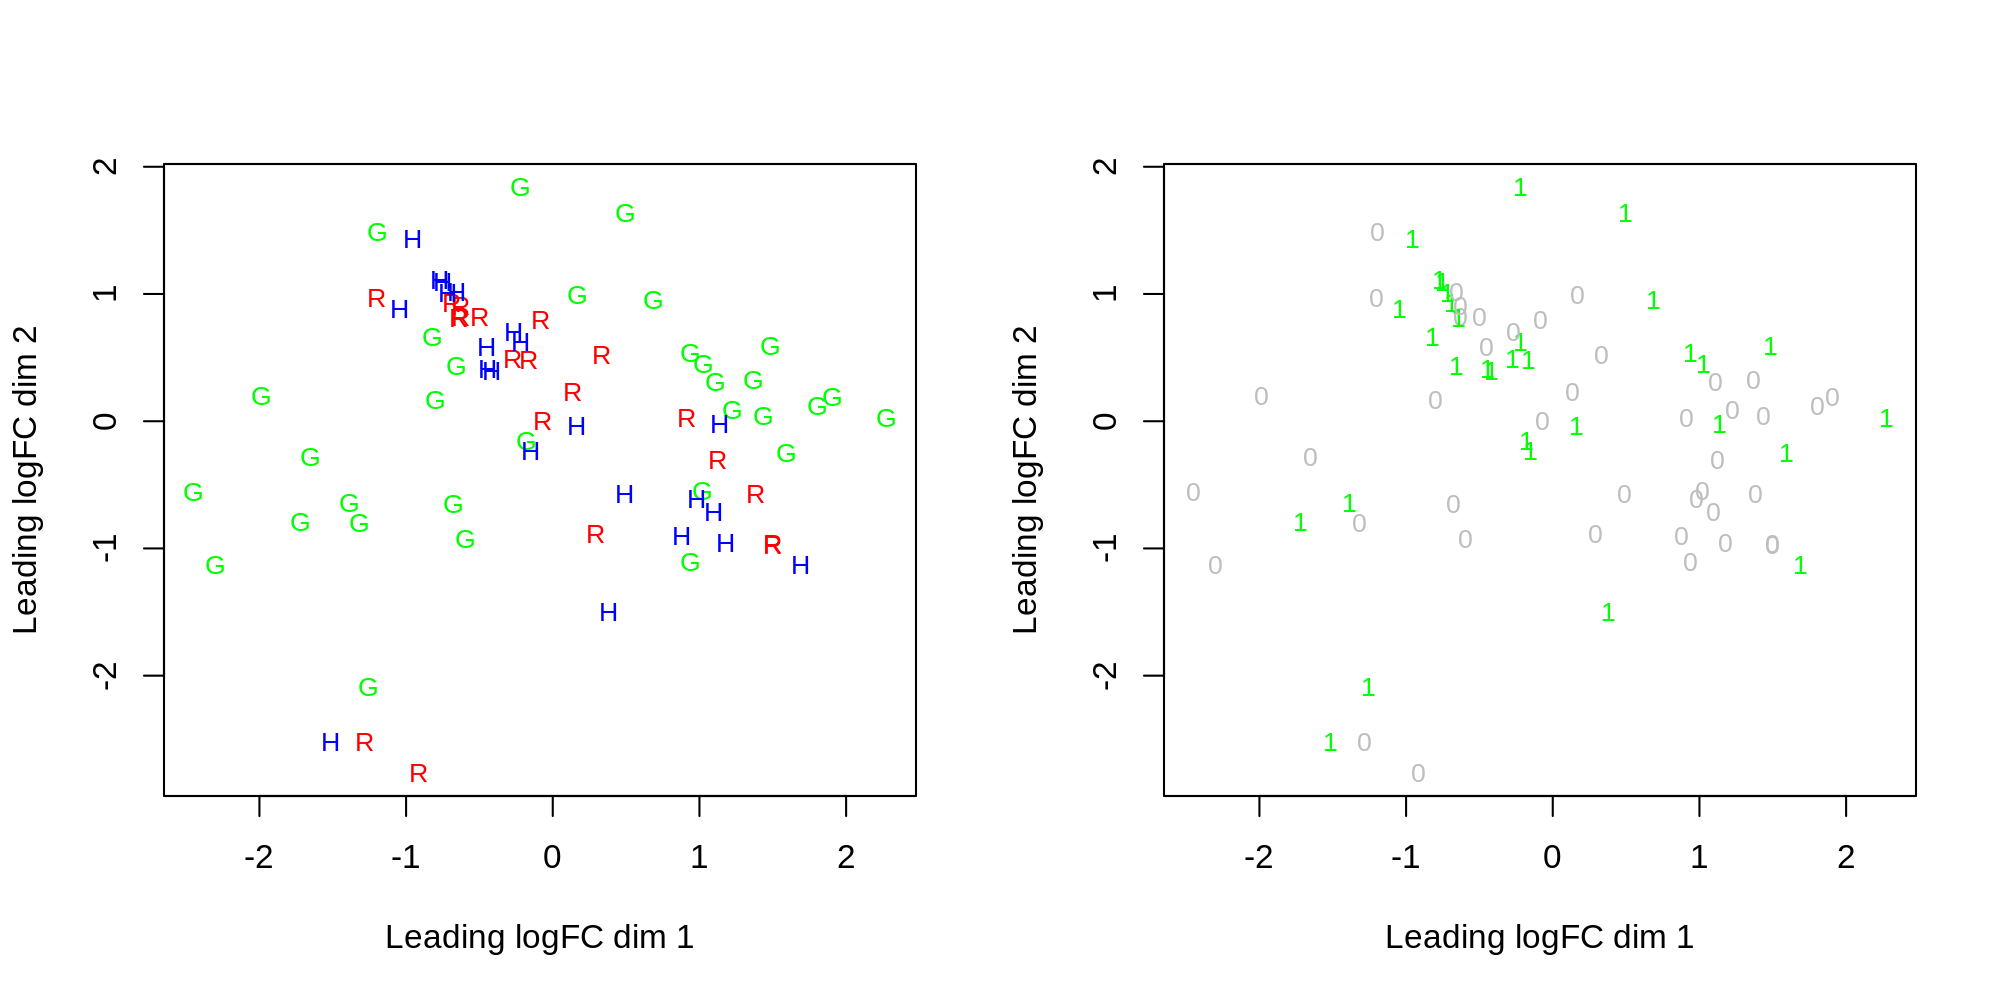

In [6]:
# dge_list <- DGEList(counts=exp, group=as.factor(ph$Source))
options(repr.plot.height=5, repr.plot.width=10, repr.plot.res=200)
par(mfrow=c(1,2))
plotMDS(trainTransformed, labels=ph$src, pch=19, col=ph$clr, cex=0.8)
plotMDS(trainTransformed, labels=as.character(ph$Response), pch=19, col=ph$clr_res, cex=0.8)

# Differential Expression

`TODO:`
STICK TO EBAYES<br>
Use treat/eBayes(0 Response Source as factors)?<br>
Best way to implement design matrix<br>
Rank on P values<br>
Take top 150/500<br>

In [7]:
#eBayes/ treat
# bayes <- eBayes(lin_mod)
# output <- topTable(lin_mod, number=Inf)
design <- model.matrix(~0+as.factor(ph$Response)+as.factor(ph$Source))
lin_mod <- lmFit(trainTransformed,design)
lin_mod <- eBayes(lin_mod)
output <- topTable(lin_mod, number=Inf)
ordered_output <- output[order(output$P.Value),]
# ordered_output
nrow(ordered_output[ordered_output$P.Value < 0.05, ])
# ordered_output[ordered_output$P.Value < 0.05, ]

[1] 128

# Output DiffEx Genes

In [8]:
limma128 <- rownames(ordered_output[ordered_output$P.Value < 0.05, ])
saveRDS(limma128, 
        "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/limma128.list.rds")

In [10]:
length(limma128)

[1] 128

In [11]:
ordered_output[ordered_output$P.Value < 0.05, ]

,as.factor.ph.Response.0,as.factor.ph.Response.1,as.factor.ph.Source.HugoAntiPD1,as.factor.ph.Source.RiazAntiPD1,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9383,-0.002518445,0.010592948,-0.004460835,-0.27011343,-0.0711784781,5.351929,0.0007698042,0.9999954
100128054,-0.042837909,0.006542557,0.077674907,-0.51796994,-0.1383835291,5.232064,0.0009130224,0.9999954
654463,0.003044506,0.014263886,-0.064240045,-0.26951536,-0.0840442515,4.709312,0.0019332645,0.9999954
27232,-0.095583126,-0.028910812,0.061695289,-0.49357615,-0.1818089720,4.597473,0.0022726304,0.9999954
8611,0.319280218,-0.307638861,0.133507935,-0.71697625,-0.1059057422,4.571005,0.0023614444,0.9999954
5588,-0.341686546,0.629448536,-0.316314352,-0.08327769,-0.0382831269,4.480120,0.0026941395,0.9999954
64699,-0.267506755,0.468713705,-0.167133296,0.07199824,0.0206295567,4.479507,0.0026965393,0.9999954
126731,-0.304485861,0.525095978,-0.168111138,0.49889726,0.1391103430,4.387475,0.0030823902,0.9999954
6610,-0.538962953,0.472005256,-0.096437173,0.46569001,-0.0045958585,4.344804,0.0032798601,0.9999954


make r function to print plot:
remove random part
litsur, jmim, prat
4 rows * 4 columns -> options, par

In [ ]:
cmn_path <- "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/"

plot_list <- function(pathRDS = NULL, group = NULL){
                    fbcf.gl <- readRDS(pathRDS)


                    perc.fbcf.gl <- c(length(which(fbcf.gl %in% ord.gl[1:100])),
                                     length(which(fbcf.gl %in% ord.gl[1:200])),
                                     length(which(fbcf.gl %in% ord.gl[1:300])),
                                     length(which(fbcf.gl %in% ord.gl[1:400])),
                                     length(which(fbcf.gl %in% ord.gl[1:500])),
                                     length(which(fbcf.gl %in% ord.gl[1:600])),
                                     length(which(fbcf.gl %in% ord.gl[1:700])),
                                     length(which(fbcf.gl %in% ord.gl[1:800])),
                                     length(which(fbcf.gl %in% ord.gl[1:900])),
                                     length(which(fbcf.gl %in% ord.gl[1:1000]))
                                     )*100/length(fbcf.gl)


                    plot(perc.fbcf.gl, col="red", main=group,
                         axes = FALSE,
                         xlab= "Ranked DiffExp", 
                         ylab = "% Overlap Gene List",
                         ylim=c(0,100))
                    axis(1, at=1:10, labels=c("100","200", "300", "400", "500","600",
                                                           "700", "800", "900","1000"),
                        las=2) 
                    axis(2, at=c(0, 20, 40, 60, 80, 100), labels=c(0, 20, 40, 60, 80, 100))
                    grid(lty="dashed")
                    }

options(repr.plot.height=7, repr.plot.width=12, repr.plot.res=300)
par(mfrow=c(2, 4), mgp=c(3, 0.7, 0))
plot_list(paste0(cmn_path, "ml.list.rds"), "MergedRank")
plot_list(paste0(cmn_path, "fcbf44.list.rds"), "FCBF")
plot_list(paste0(cmn_path, "top200var.list.rds"), "Variance Rank")
plot_list(paste0(cmn_path, "limma128.list.rds"), "Limma")
plot_list(paste0(cmn_path, "ranger.imp200.rds"), "Random Forest Permutation")
plot_list(paste0(cmn_path, "jmim.list.rds"), "Mutual Information")
plot_list(paste0(cmn_path, "litsur.list.rds"), "Literature Survey")
plot_list(paste0(cmn_path, "prat.list.rds"), "Prat et al.")

In [ ]:
length(which(fbcf.gl %in% ord.gl[1:100]))
length(fbcf.gl)
length(ord.gl)